Task - 1

In [4]:
#Download the dataset into your PC

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task - 2

In [6]:
# To load the dataset open the file section and upload your file there

In [7]:
df = pd.read_csv('/content/penguins_size.csv')

Task - 3

1. Univariate analysis


<ipython-input-8-04c41cfbcb54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

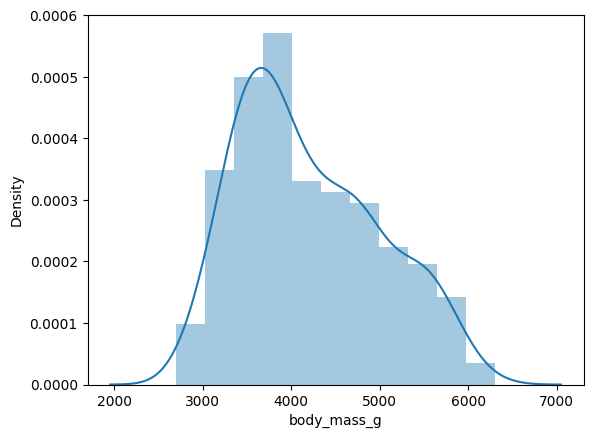

In [8]:
sns.distplot(df['body_mass_g'])

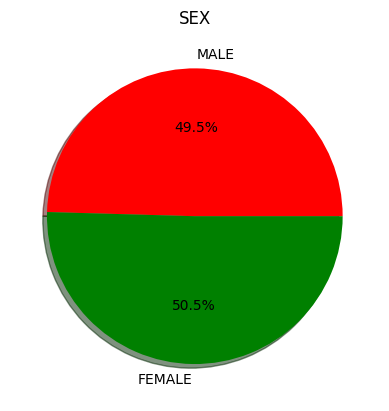

In [9]:
df_sex = df[df['sex'].isin(['MALE','FEMALE'])]
plt.pie(df_sex['sex'].value_counts().sort_index(),labels=df_sex['sex'].value_counts().index,autopct ='%1.1f%%',shadow = True , colors = ['red','green'])
plt.title('SEX')
plt.show()

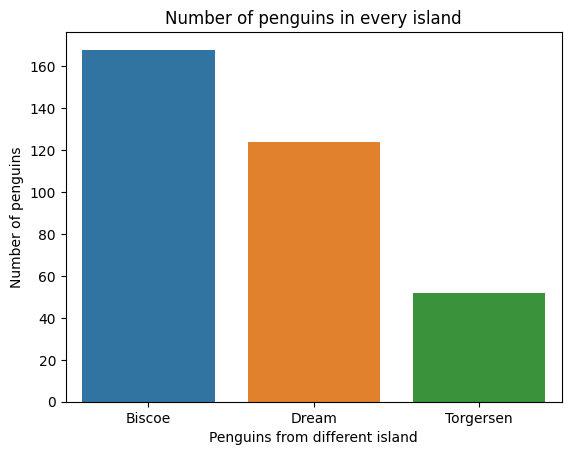

In [10]:
sns.barplot(x = df['island'].value_counts().index , y = df['island'].value_counts())
plt.xlabel('Penguins from different island')
plt.ylabel('Number of penguins')
plt.title('Number of penguins in every island')
plt.show()

2. Bivariate analysis

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

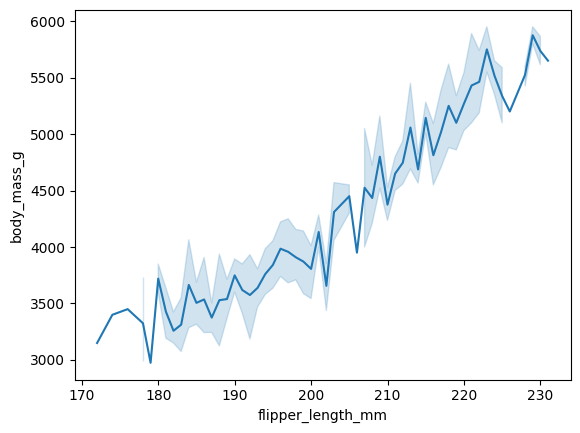

In [11]:
sns.lineplot(x=df['flipper_length_mm'],y=df['body_mass_g'])

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

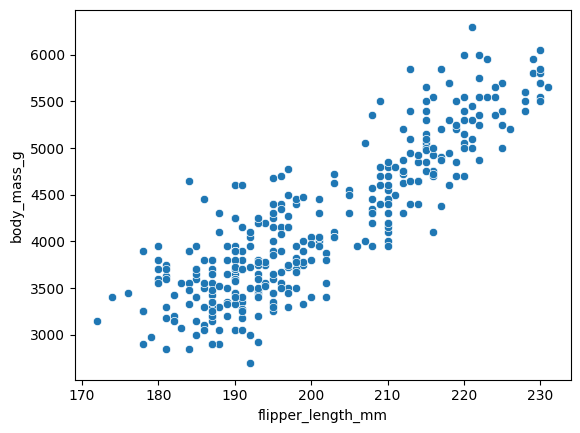

In [12]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['body_mass_g'])

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

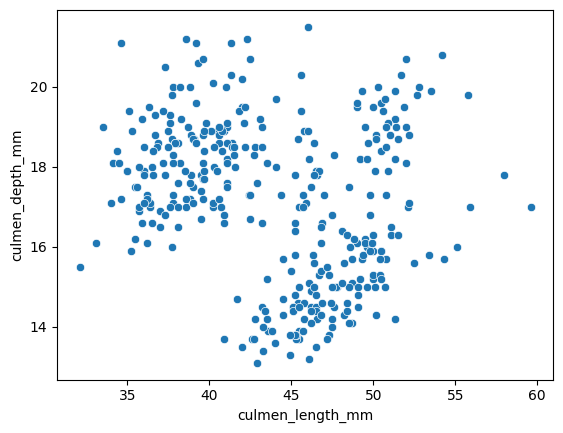

In [13]:
sns.scatterplot(x=df['culmen_length_mm'],y=df['culmen_depth_mm'])

3. Multivariate analysis

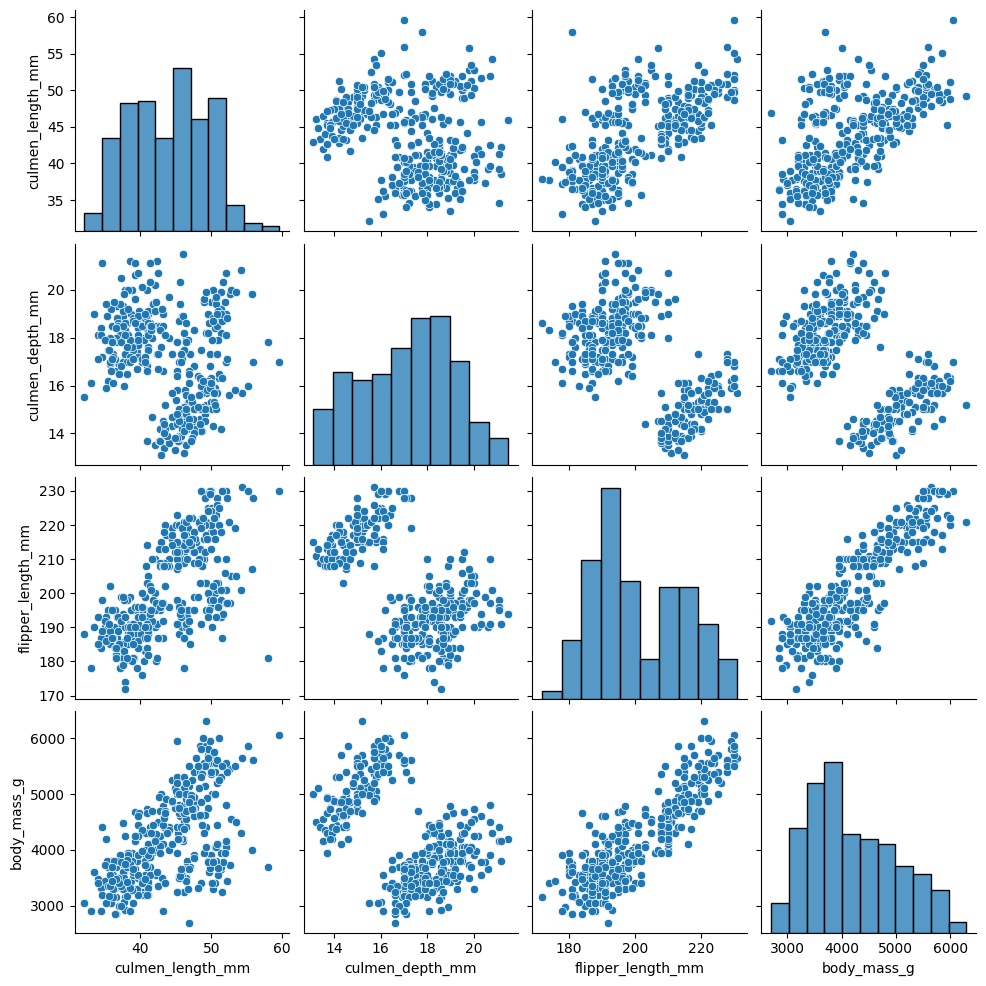

In [14]:
sns.pairplot(df)

<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

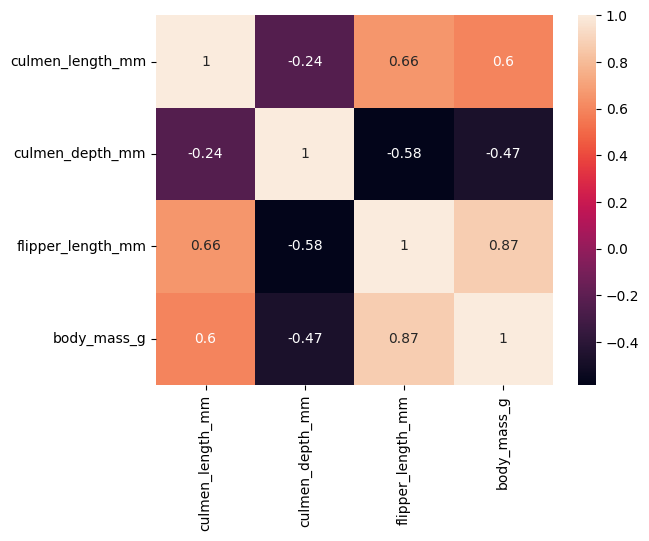

In [15]:
sns.heatmap(df.corr(),annot=True)

Task - 4

In [16]:
#descriptive analysis
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Task - 5

In [17]:
#check if dataframe has null values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [18]:
#numerical parameters having null values
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

In [19]:
#categorial parameters having null values
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [20]:
#check again and we see all null values removed
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Task - 6

<Axes: >

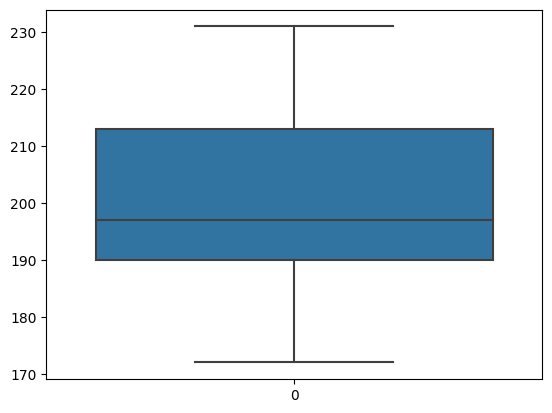

In [21]:
sns.boxplot(df['flipper_length_mm'])

In [22]:
#IQR method to replace outliners
q1 = df['flipper_length_mm'].quantile(0.25)
q3 = df['flipper_length_mm'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ul

247.5

In [23]:
ll = q3 - 1.5*iqr
ll

178.5

In [24]:
df['flipper_length_mm'].median()

197.0

In [25]:
df['flipper_length_mm'] = np.where(df['flipper_length_mm']>ul,197,df['flipper_length_mm'])

In [26]:
df['flipper_length_mm'] = np.where(df['flipper_length_mm']<ll,197,df['flipper_length_mm'])

<Axes: >

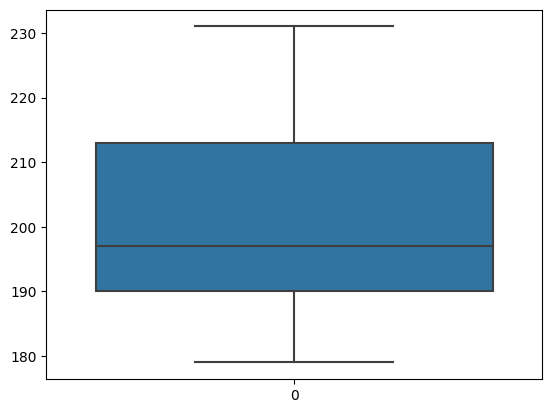

In [27]:
sns.boxplot(df['flipper_length_mm'])

In [28]:
df['flipper_length_mm'].tail()

339    197.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, dtype: float64

Task - 7

In [29]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.648013,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.595542,-0.471942
flipper_length_mm,0.648013,-0.595542,1.000000,0.865776
body_mass_g,0.594925,-0.471942,0.865776,1.000000


Task - 8

In [30]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [31]:
df_main = pd.get_dummies(df,columns =['species','island'])
df_main['sex'] = le.fit_transform(df_main['sex'])
df_main

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10,18.7,181.0,3750.0,2,1,0,0,0,0,1
1,39.50,17.4,186.0,3800.0,1,1,0,0,0,0,1
2,40.30,18.0,195.0,3250.0,1,1,0,0,0,0,1
3,44.45,17.3,197.0,4050.0,2,1,0,0,0,0,1
4,36.70,19.3,193.0,3450.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4050.0,2,0,0,1,1,0,0
340,46.80,14.3,215.0,4850.0,1,0,0,1,1,0,0
341,50.40,15.7,222.0,5750.0,2,0,0,1,1,0,0
342,45.20,14.8,212.0,5200.0,1,0,0,1,1,0,0


Task - 9

In [32]:
#dependant values
dep = df_main[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
dep.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0


In [33]:
#independent values
indep =df_main.drop(columns =['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'],axis =1)
indep.head()

,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,2,1,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,2,1,0,0,0,0,1
4,1,1,0,0,0,0,1


Task - 10

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [35]:
indep_scaled= pd.DataFrame(scale.fit_transform(indep),columns =indep.columns)
indep_scaled.head()

,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.5,1.0,0.0,0.0,0.0,0.0,1.0
2,0.5,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.5,1.0,0.0,0.0,0.0,0.0,1.0


Task - 11

In [36]:
from sklearn.model_selection import train_test_split
indep_train,indep_test,dep_train,dep_test = train_test_split(indep_scaled,dep,test_size=0.3,random_state=10)


Task - 12

In [37]:
indep_train.shape

(240, 7)

In [38]:
indep_train.head()

,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
258,0.5,0.0,0.0,1.0,1.0,0.0,0.0
332,0.5,0.0,0.0,1.0,1.0,0.0,0.0
121,1.0,1.0,0.0,0.0,0.0,0.0,1.0
61,1.0,1.0,0.0,0.0,1.0,0.0,0.0
70,0.5,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
dep_train.shape

(240, 4)

In [40]:
indep_test.shape

(104, 7)